In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from math import sqrt

C:\Users\VezoR\anaconda3\envs\DL\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
class kNN(object):
    def __init__(self, x, y, k, labels):
        self.x = x
        self.y = y
        self.k = k
        self.labels = labels
    def predict(self, x_pred , y_pred):
        distance = np.ndarray(shape=(len(self.labels), 2), dtype=float)
        major = []
        predicted = []
        for a in range(len(x_pred)):
            for i in range(len(self.labels)):
                #print((x_pred[a]-self.x[i])**2 + (y_pred[a]-self.y[i])**2)
                x1 = self.x
                x2 = x_pred
                y1 = self.y
                y2 = y_pred 
                dist = sqrt((x2[a] - x1[i])**2 + (y2[a] - y1[i])**2)
                distance[i, 0] = dist
                distance[i, 1] = self.labels[i]
            distance = distance[distance[:, 0].argsort()]
            major = distance[:self.k]
            label = np.unique(major[:, 1])
            common = np.ndarray(shape=(len(label), 1), dtype=float)
            for a in range(len(label)):
                common[a] = np.count_nonzero(major[:, 1] == label[a])
            predicted.append(label[np.argmax(common)]) 
        return predicted

In [3]:
xy, labels = make_blobs(n_samples=100, centers=3, n_features=2)
df = pd.DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels))
print(df)

           x         y  label
0  -0.026548  2.928019      0
1  -1.785403  1.754289      0
2   8.850158 -2.776567      2
3   0.285344  3.318715      0
4  -2.781148 -4.985179      1
..       ...       ...    ...
95 -0.749761  4.325027      0
96  0.942982  0.395205      0
97 -2.806792 -5.935397      1
98  0.116624 -5.961866      1
99  7.401231 -3.127225      2

[100 rows x 3 columns]


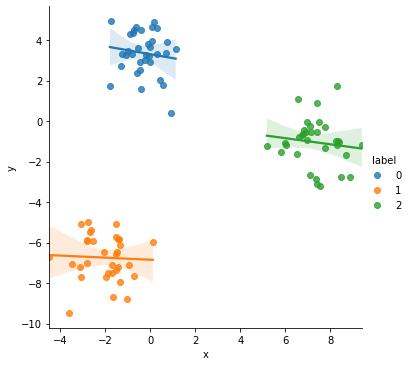

In [4]:
sns.lmplot(data=df, x='x', y='y', hue='label')

In [5]:
knn = kNN(x=list(df[['x']].values.reshape(-1)), 
          y=list(df[['y']].values.reshape(-1)), 
          k=7, 
          labels=list(df[['label']].values.reshape(-1)))

In [6]:
avx = df[['x']].mean()
avy = df[['y']].mean()
np.random.seed(10)
x_pred = np.linspace(avx, avx, 50)
y_pred = np.linspace(avy, avy, 50)
for a in range(len(x_pred)):
    if np.random.random(1)<0.3:
        x_pred[a] += np.random.random(1)*5
        y_pred[a] -= np.random.random(1)*5
    else:
        x_pred[a] -= np.random.random(1)*5
        y_pred[a] += np.random.random(1)*5
#print(x_pred, y_pred[0])
labels = knn.predict(x_pred, y_pred)

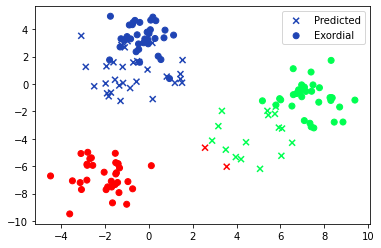

In [10]:
def colorChange(labels):
    l = []
    for a in range(len(labels)):
        if labels[a] == 0:
            l.append('#1f44b4') 
        elif labels[a] == 1:
            l.append('#ff0000')
        else:
            l.append('#00ff51')
    return l

l_pred = colorChange(labels)
l_ex = colorChange(df.loc[:, 'label'])
fig, ax = plt.subplots()
ax.scatter(x=x_pred, y=y_pred, color=l_pred, marker='x', label='Predicted')
ax.scatter(x=df[['x']], y=df[['y']], color=l_ex, label='Exordial')
ax.legend()